                                  job_group  avg_min_salary_vnd  \
0                                     Other        1.842857e+07   
1                         Software Engineer        1.972333e+07   
2  Network Engineer / Cyber Security Expert        2.436000e+07   
3                           Project Manager        2.200000e+07   
4                             Data Engineer        1.500000e+07   
5                  Data Scientist / Analyst        9.360000e+06   
6                Quality Assurance / Tester        2.496000e+07   
7                            UI/UX Designer        1.500000e+07   
8            Machine Learning / AI Engineer        1.125000e+07   
9        Product Manager / Business Analyst        1.240000e+07   

   avg_max_salary_vnd  
0        2.095000e+07  
1        2.679800e+07  
2        3.116000e+07  
3        3.275000e+07  
4        1.500000e+07  
5        2.968000e+07  
6        2.853333e+07  
7        9.500000e+06  
8        1.857143e+07  
9        2.653333e+07 

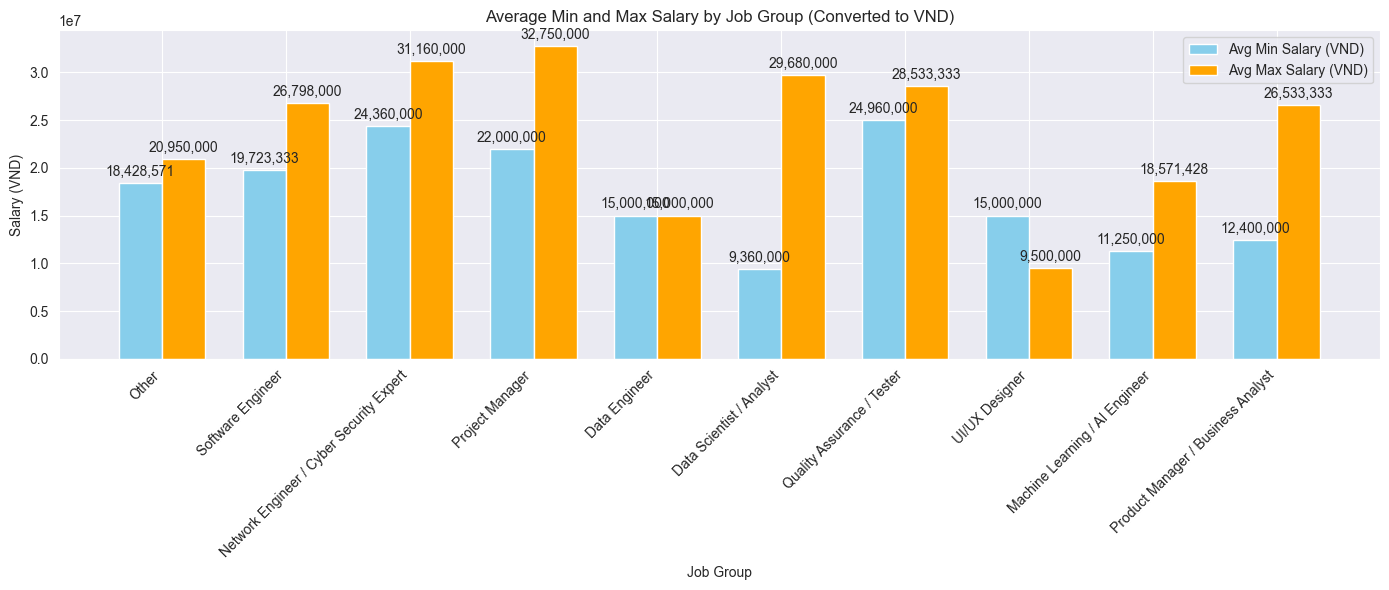

In [41]:
import importlib
import src.db.command_sql as c
#reload jupyter notebook cache
importlib.reload(c)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.db.db_client import get_engine_pg
from src.db.command_sql import SALARY_QUERY_SQL
from src.utils.contants import USD_TO_VND

engine = get_engine_pg()
# Query get avg min and max salary
salary_avg = pd.read_sql_query(SALARY_QUERY_SQL, engine, params={"usd_to_vnd": USD_TO_VND})
print(salary_avg)

# Two bar chart
job_groups = salary_avg['job_group']
min_salaries = salary_avg['avg_min_salary_vnd']
max_salaries = salary_avg['avg_max_salary_vnd']

x = np.arange(len(job_groups))
width = 0.35

fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/2, min_salaries, width, label='Avg Min Salary (VND)', color='skyblue')
rects2 = ax.bar(x + width/2, max_salaries, width, label='Avg Max Salary (VND)', color='orange')

# Label and title
ax.set_xlabel('Job Group')
ax.set_ylabel('Salary (VND)')
ax.set_title('Average Min and Max Salary by Job Group (Converted to VND)')
ax.set_xticks(x)
ax.set_xticklabels(job_groups, rotation=45, ha='right')
ax.legend()

# Add value on bar
for rect in rects1 + rects2:
    height = rect.get_height()
    if pd.notnull(height):
        ax.annotate(f'{int(height):,}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


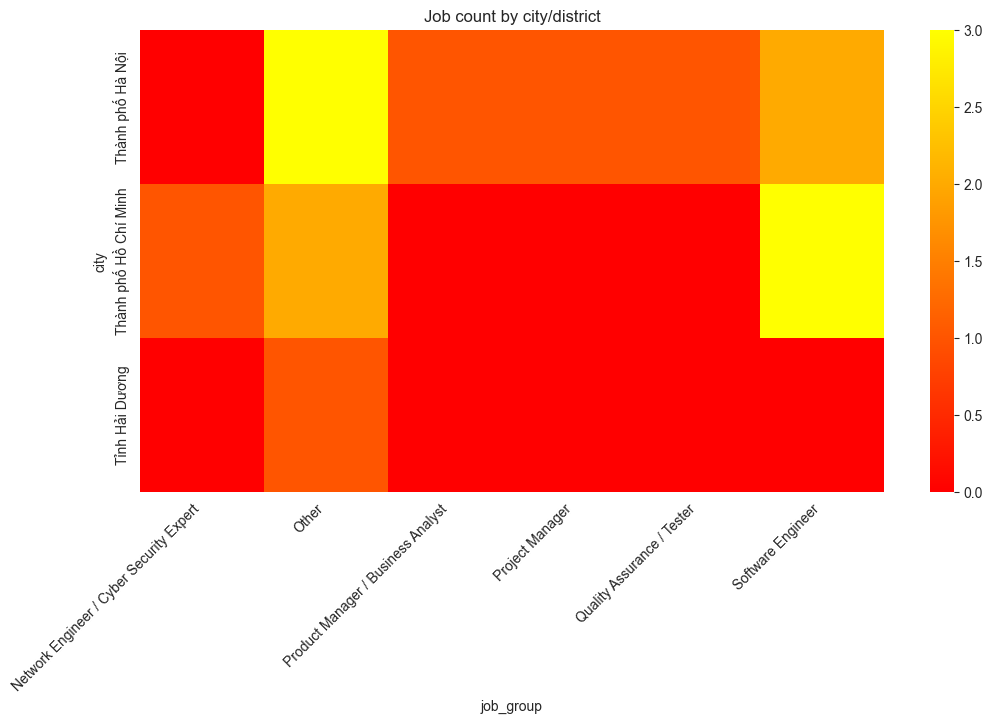

In [36]:
#count group jobs by city
from src.db.command_sql import JOBS_BY_CITY_QUERY_SQL
job_by_city = pd.read_sql_query(JOBS_BY_CITY_QUERY_SQL, engine)
heat = job_by_city.pivot_table(index='city', columns='job_group', values='job_title', aggfunc='count').fillna(0)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap='autumn')
plt.title("Job count by city/district")
plt.xticks(rotation=45, ha='right')
plt.show()

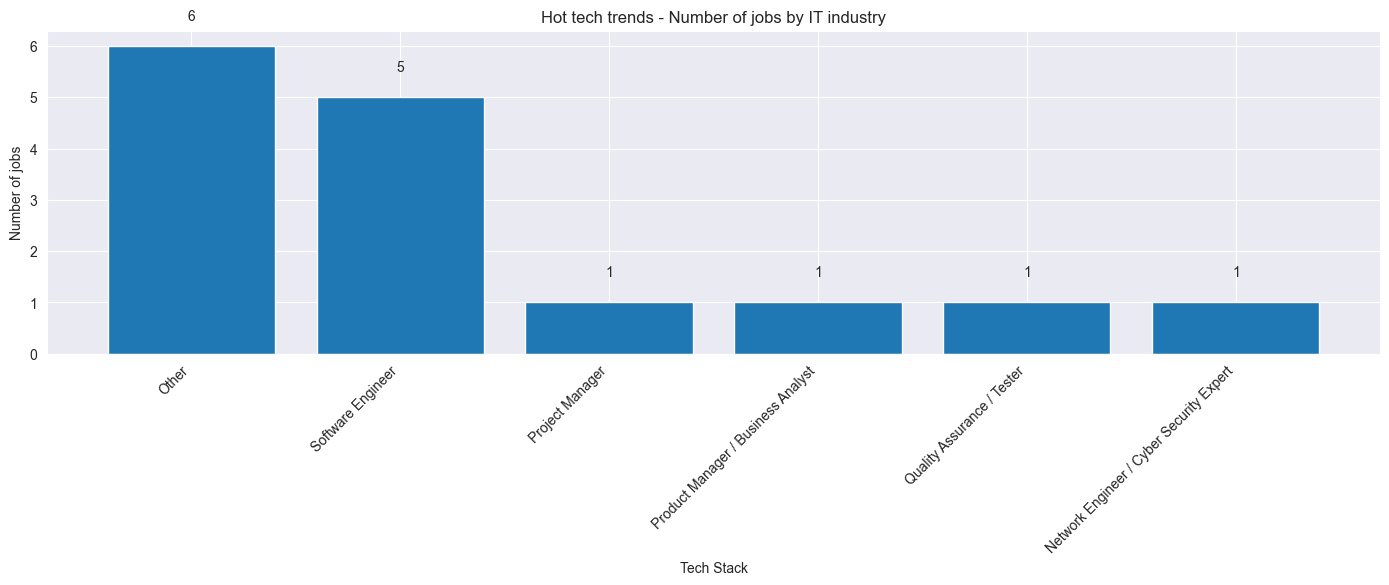

In [37]:
from src.db.command_sql import TECH_COUNT_QUERY_SQL
tech_count = pd.read_sql_query(TECH_COUNT_QUERY_SQL, engine)

plt.figure(figsize=(14, 6))

# Draw bar chart
plt.bar(tech_count['job_group'], tech_count['count'])

plt.ylabel("Number of jobs")
plt.xlabel("Tech Stack")
plt.title("Hot tech trends - Number of jobs by IT industry")

# rotate label
plt.xticks(rotation=45, ha='right')

# Add value on bar
for x, y in zip(tech_count['job_group'], tech_count['count']):
    plt.text(x, y + 0.5, str(y), ha='center')

plt.tight_layout()
plt.show()
